In [2]:
!pip install yfinance

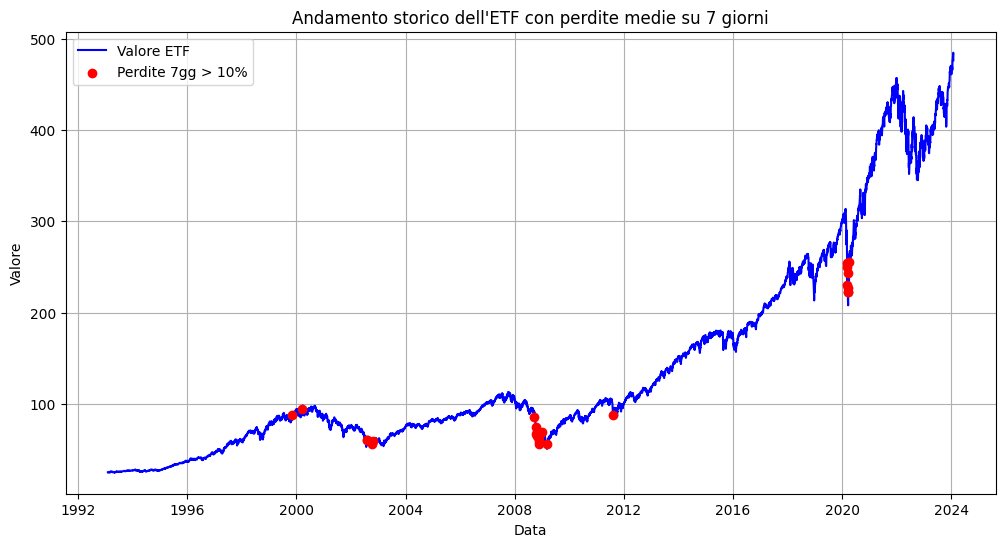

Rendimento netto dal 2008-01-01 al 2023-06-01: 190.24%
Rendimento netto dal 2023-06-01 al 2023-12-31: -15.67%


In [52]:
#Facciamo Market timing?
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

def scarica_dati_etf(ticker="SPY", start="1993-02-1", end="2024-02-1"):
    etf = yf.Ticker(ticker)
    df = etf.history(start=start, end=end)
    df = df.reset_index()[["Date", "Close"]]
    df.columns = ["Data", "Valore"]
    df.to_csv("dati_etf.csv", index=False)
    return df

def calcola_rendimento(df, date_start, date_end, investimento_iniziale, transazioni=[], tasse_percentuali=0):
    """
    Calcola il rendimento netto dell'ETF per un periodo specifico.
    """
    df_filtered = df[(df['Data'] >= date_start) & (df['Data'] <= date_end)]

    if df_filtered.empty:
        print(f"Nessun dato disponibile tra {date_start} e {date_end}")
        return None

    prezzo_iniziale = df_filtered.iloc[0]['Valore']
    prezzo_finale = df_filtered.iloc[-1]['Valore']

    rendimento_lordo = (prezzo_finale - prezzo_iniziale) / prezzo_iniziale
    costo_totale_transazioni = sum(transazioni)
    investimento_totale = investimento_iniziale + costo_totale_transazioni
    valore_finale_netto = investimento_totale * (1 + rendimento_lordo) * (1 - tasse_percentuali)
    rendimento_netto = (valore_finale_netto - investimento_totale) / investimento_totale * 100

    return rendimento_netto

df = scarica_dati_etf()

# Calcolo della media mobile a 7 giorni della variazione percentuale
df['Variazione'] = df['Valore'].pct_change() * 100
df['MediaMobile7']= (1 + df['Variazione']).rolling(window=3).apply(lambda x: x.prod(), raw=True) - 1

# Identifica i punti dove la media mobile a 7 giorni è inferiore a -10%
soglia_perdita = +30
perdite_significative = df[df['MediaMobile7'] > soglia_perdita]

# Plot del valore dell'ETF nel tempo
plt.figure(figsize=(12,6))
plt.plot(df['Data'], df['Valore'], label='Valore ETF', color='blue')
plt.scatter(perdite_significative['Data'], perdite_significative['Valore'], color='red', label='Perdite 7gg > 10%', zorder=3)
plt.xlabel('Data')
plt.ylabel('Valore')
plt.title('Andamento storico dell\'ETF con perdite medie su 7 giorni')
plt.legend()
plt.grid()
plt.show()


# Dati di input
# Finestre temporali di analisi
finestre = [("2008-01-01", "2023-06-01"), ("2023-06-01", "2023-12-31")]
investimento_iniziale = 1000
transazioni = len(finestre) * [19]  # Costi di transazione es: 19 euro per ogni uscita di mercato
tasse_percentuali = 0.26  # % di tasse sul rendimento



for start, end in finestre:
    rendimento = calcola_rendimento(df, start, end, investimento_iniziale, transazioni, tasse_percentuali)
    print(f"Rendimento netto dal {start} al {end}: {rendimento:.2f}%")


[19, 19]
